<a href="https://colab.research.google.com/github/Suryan5h/Deep-Learning/blob/main/MLC_C6_Melanoma_Detection_Suryansh_Bhardwaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Building a simple CNN model

#### **Task 1: Reading the data**

Importing all the important libraries

In [1]:
# Importing the required libraries
import pathlib
import os
import PIL

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

You are expected to load the data in the Colab environment by mounting the Google Drive. This will allow you to access the files from Google drive through Colab. 

Steps:
1. Upload the dataset in your Google Drive in a separate folder. Avoid spaces in the name of the folder or the zip file.
2. Mount the Google Drive using the code given below.
3. Unzip the file to access images.
4. Check the path for the datasets - train and test.


Note: The code is commented for you to learn and then make edits to execute the command.

In [2]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Unzipping the files
!unzip /content/drive/My\ Drive/Colab\ Notebooks/CNN_assignment.zip

Archive:  /content/drive/My Drive/Colab Notebooks/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.j

Check the path mentioned in the output: `Skin cancer ISIC The International Skin Imaging Collaboration`

Provide the path for train and test images using pathlib library.

In [4]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

Check whether the data has been extracted successfully.

In [5]:
# Train and test images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)
print("Total Images count: \t",image_count_train + image_count_test)

Train images:	 2239
Test images:	 118
Total Images count: 	 2357


#### **Task 2: Loading the images using keras.preprocessing**

The images are still not loaded in the Colab environment. We have extracted them from the zip file. Now, you are expected to load them in the Colab notebook using the `preprocessing` attribute.

Let's load these images off disk using the helpful image_dataset_from_directory utility. You can refer to the following [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) to know more about the function. You can even refer to the additional notebooks on the page to check how the variables are defined.



Defining the parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Divide the training set into 2 parts: 
*   80% for training 
*   20% for validation



In [7]:
## All Libraries
import tensorflow as tf

# importing different elements (datasets, layers, etc.) to build the CNN model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D , Dropout

In [8]:
# Training Dataset
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.20,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
# Validation dataset
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.20,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
val_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the 'class_names' attribute associated with the training and validation datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Task 3: Visualize the data**

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

Write the code to visualize one instance of all the nine classes present in the dataset

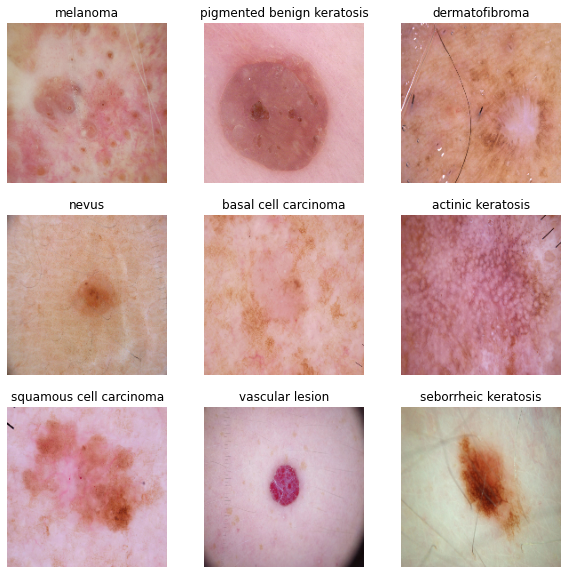

In [14]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
# visualize the images.
# import PIL.Image
used_labels=[]

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(4):
  j=1
  used_labels=[class_names[labels[0]]]
  ax = plt.subplot(3, 3,1)
  plt.imshow(images[0].numpy().astype("uint8"))
  plt.title(class_names[labels[0]])
  plt.axis("off")
  for i in range(1,32):
    if len(used_labels)>0 and class_names[labels[i]] not in used_labels:
      used_labels.append(class_names[labels[i]])
      ax = plt.subplot(3, 3, j + 1)
      j+=1
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

#### Configure the dataset for performance
Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Task 4: Create the model**
Create a CNN model, which can accurately detect 9 classes present in the dataset. 


*   Note: The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`. Use `layers.experimental.preprocessing.Rescaling` for this purpose.

In [16]:
### Your code goes here
model = models.Sequential()

# Adding layers to the model

# Convolution and Normalisation
# Input layer with 32 filters of size 3x3 and rescaling
model.add(layers.Rescaling(scale=1./255,input_shape = (180,180,3)))
# 2 Conv Layers
model.add(layers.Conv2D(32,(3,3), strides=(1, 1), padding='same', activation = 'relu' ))
model.add(layers.Conv2D(32,(3,3), strides=(1, 1), padding='same', activation = 'relu'))

# Pooling layer
model.add(layers.MaxPool2D(pool_size = (2,2)))

# 2nd Conv Block - 2 convolution layers and 1 Pooling layer
model.add(layers.Conv2D(64,(3,3), strides=(1, 1), padding='same', activation = 'relu'))
model.add(layers.Conv2D(128,(3,3), strides=(1, 1), padding='same', activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))

# Flatten and 2 Dense layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))

# Output layer
model.add(Dense(9,activation='softmax'))

#### **Question**: 
Explain the following elements associated with the problem:
1.   Selection of stride value (Reason for using a high/low value)
2.   Padding strategy used (Same/Valid)

#### **Answer:**
1. As we are looking for granular features in our data, it is better to use stride=(1,1) (low value) and we don't want any information loss. So I am using stride as (1,1).
2. For effective overall performance of the model<br>
A. We need same output after passing through a convolution layer <br>
B. Even corner pixels might be necessary so I am using padding = 'same'

For Pooling layer, by default strides=None and padding='valid'

#### **Task 5: Compile the model**
Choose an appropirate optimiser and loss function for model training.

In [17]:
# Model Compile
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       73856     
                                                        

#### Train the model

In [19]:
# The model needs to be trained for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 29s 172ms/step - loss: 2.3990 - accuracy: 0.2338 - val_loss: 1.9447 - val_accuracy: 0.2215
Epoch 2/20
56/56 [==============================] - 7s 117ms/step - loss: 1.8012 - accuracy: 0.3348 - val_loss: 1.6856 - val_accuracy: 0.3937
Epoch 3/20
56/56 [==============================] - 7s 117ms/step - loss: 1.6729 - accuracy: 0.3962 - val_loss: 1.6273 - val_accuracy: 0.4295
Epoch 4/20
56/56 [==============================] - 7s 122ms/step - loss: 1.5250 - accuracy: 0.4777 - val_loss: 1.5783 - val_accuracy: 0.4765
Epoch 5/20
56/56 [==============================] - 7s 122ms/step - loss: 1.4513 - accuracy: 0.5073 - val_loss: 1.5122 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 7s 117ms/step - loss: 1.2907 - accuracy: 0.5458 - val_loss: 1.9210 - val_accuracy: 0.4228
Epoch 7/20
56/56 [==============================] - 7s 117ms/step - loss: 1.2339 - accuracy: 0.5564 - val_loss: 1.5044 - val_accuracy: 0.5190
Epoch

#### Visualizing training results

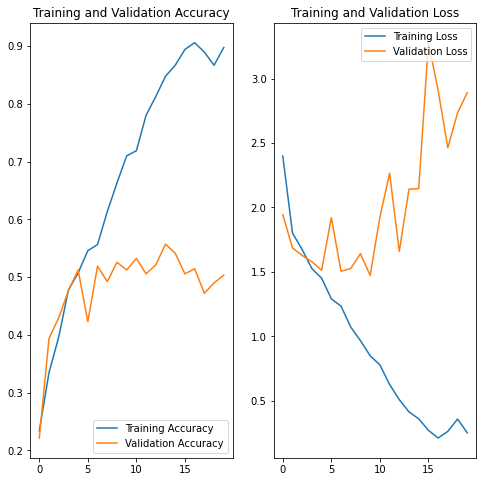

In [20]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit

#### **Answer:**
1. At the end of 20 epochs, final training accuracy around 90% and validation accuracy around 50% which clearly suggests that the model is overfitted. <br>
2. After 6 epochs, training loss keeps on decreasing while validation loss increases with the the number of epochs.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [21]:
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.05,fill_mode='reflect'),
    layers.experimental.preprocessing.RandomZoom(0.1,fill_mode='nearest'),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times

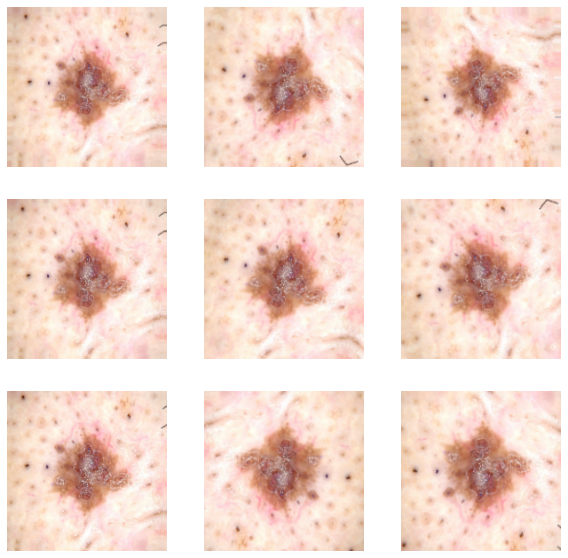

In [22]:
# Visualizing how the augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### **Task 6: Create, compile and train the model**

Model Definition

In [23]:
## You should also include dropouts to tackle with overfitting. (compulsory)
# Model 2
### Your code goes here
model2 = models.Sequential()

# Adding layers to the model

# Convolution and Normalisation
# Input layer with 32 filters of size 3x3
model2.add(layers.Rescaling(scale=1./255,input_shape = (180,180,3)))

# Data Augmentation Layer
model2.add(data_augmentation)
model2.add(layers.Conv2D(32,(3,3), padding='same', activation = 'relu' ))

# Dropout Layer with rate=0.10
model2.add(Dropout(rate=0.10))
model2.add(layers.Conv2D(32,(3,3), padding='same', activation = 'relu'))

# Pooling layer
# General Syntax
# tf.keras.layers.MaxPool2D(
#    pool_size=(2, 2), strides=None, padding='valid')

model2.add(layers.MaxPool2D(pool_size = (2,2)))

# 2nd Conv Block - 2 convolution layers and 1 Pooling layer
model2.add(layers.Conv2D(64,(3,3), padding='same', activation = 'relu'))
model2.add(layers.Conv2D(128,(3,3), padding='same', activation = 'relu'))
model2.add(layers.MaxPool2D(pool_size = (2,2)))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dense(512,activation='relu'))

# Output layer
model2.add(Dense(9,activation='softmax'))


In [24]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 dropout (Dropout)           (None, 180, 180, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                      

Compiling the model

In [25]:
### Choose an appropirate optimiser and loss function
model2.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model

In [26]:
# Note: Train your model for 20 epochs
epochs = 20

history2 = model2.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/20
56/56 [==============================] - 10s 150ms/step - loss: 2.9583 - accuracy: 0.1931 - val_loss: 2.0157 - val_accuracy: 0.1790
Epoch 2/20
56/56 [==============================] - 8s 148ms/step - loss: 1.9123 - accuracy: 0.2695 - val_loss: 1.8025 - val_accuracy: 0.3356
Epoch 3/20
56/56 [==============================] - 8s 148ms/step - loss: 1.7785 - accuracy: 0.3616 - val_loss: 1.6480 - val_accuracy: 0.4161
Epoch 4/20
56/56 [==============================] - 8s 148ms/step - loss: 1.6271 - accuracy: 0.4079 - val_loss: 1.6183 - val_accuracy: 0.4273
Epoch 5/20
56/56 [==============================] - 9s 167ms/step - loss: 1.6345 - accuracy: 0.3929 - val_loss: 1.5938 - val_accuracy: 0.4653
Epoch 6/20
56/56 [==============================] - 9s 167ms/step - loss: 1.5878 - accuracy: 0.4403 - val_loss: 1.6220 - val_accuracy: 0.4340
Epoch 7/20
56/56 [==============================] - 9s 166ms/step - loss: 1.5373 - accuracy: 0.4598 - val_loss: 1.5194 - val_accuracy: 0.4541
Epoch

#### Visualizing the results

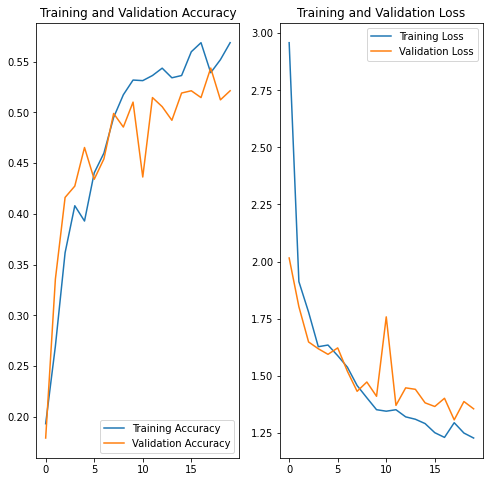

In [27]:
# Graphs
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Answer:**
1. After Data Augmentation, the model is underfitting on the training dataset as the training accuracy reduced to around 56%. <br>
2. But, as the training accuracy and validation accuracy are very similar, we can say we have resolved the problem of overfitting with the help of data augmentation and using Dropout layers.

## Distribution in the dataset

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<br>

#### **Task 7: Find the distribution of classes in the training dataset.**

In [28]:
## Your code goes here.
labels = np.concatenate([y for x,y in train_ds])
labels

array([6, 3, 4, ..., 3, 4, 5], dtype=int32)

In [29]:
count_dict=dict()
for label in labels:
  if label not in count_dict.keys():
    count_dict[label]=1
  else:
    count_dict[label]+=1
sorted(count_dict.items(), key=lambda x:x[1])

[(6, 58),
 (2, 77),
 (0, 92),
 (8, 115),
 (7, 142),
 (4, 277),
 (1, 309),
 (3, 352),
 (5, 370)]

In [32]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


<BarContainer object of 9 artists>

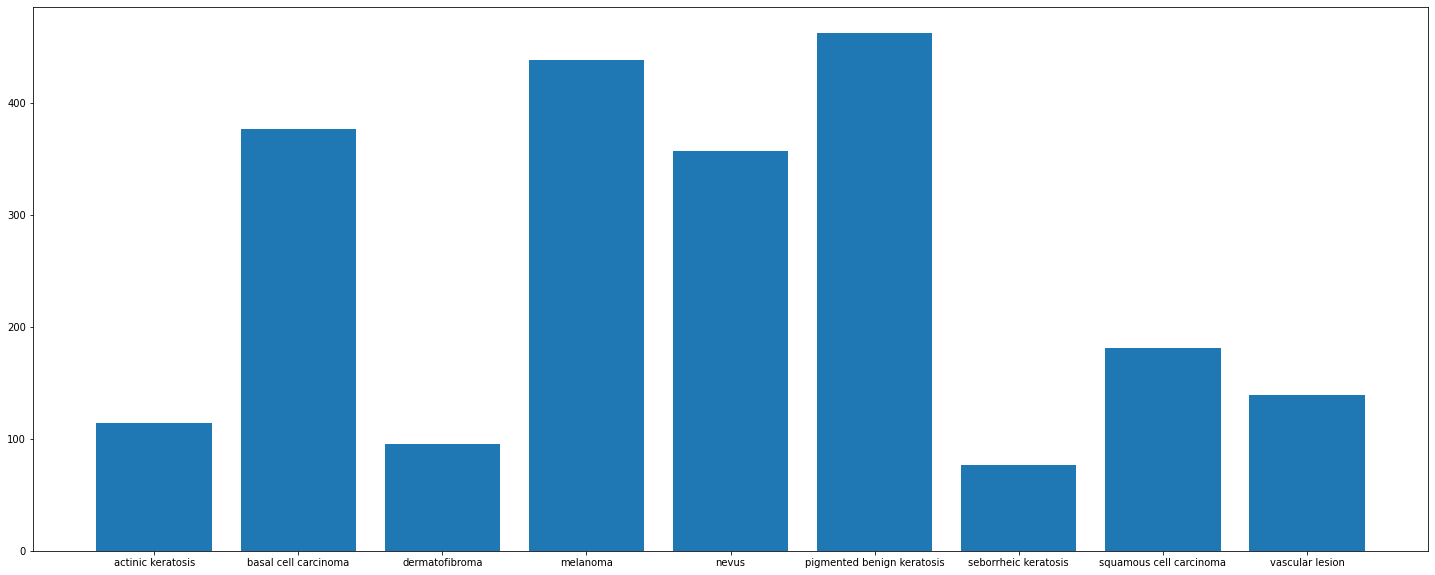

In [33]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Questions:**  
 - Which class has the least number of samples?
 - Which classes dominate the data in terms proportionate number of samples?


#### **Answer:**
1. Class with least number of samples - Seborrheic keratosis
2. Dominating Class - Pigmented Benign Keratosis

#### **Task 8: Rectifying the class imbalance**
You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [34]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [35]:
# Provide the path for the training dataset
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)
    ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3C212F0730>: 100%|██████████| 500/500 [00:17<00:00, 28.37 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3C3613BB50>: 100%|██████████| 500/500 [00:24<00:00, 20.52 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3C36685100>: 100%|██████████| 500/500 [00:24<00:00, 20.75 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F3CAB20D640>: 100%|██████████| 500/500 [01:39<00:00,  5.03 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2530x2122 at 0x7F3C36156BE0>: 100%|██████████| 500/500 [01:15<00:00,  6.62 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3C36617730>: 100%|██████████| 500/500 [00:16<00:00, 31.02 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3C36145910>: 100%|██████████| 500/500 [00:41<00:00, 12.09 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3C36527040>: 100%|██████████| 500/500 [00:16<00:00, 30.78 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3C9DEE8AF0>: 100%|██████████| 500/500 [00:16<00:00, 30.43 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

In [36]:
# Count of images under each class after addition
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [37]:
for i in class_names:
      
    for j in data_dir_train.glob(i+'/output/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
6734,Skin cancer ISIC The International Skin Imagin...,vascular lesion
6735,Skin cancer ISIC The International Skin Imagin...,vascular lesion
6736,Skin cancer ISIC The International Skin Imagin...,vascular lesion
6737,Skin cancer ISIC The International Skin Imagin...,vascular lesion


<BarContainer object of 9 artists>

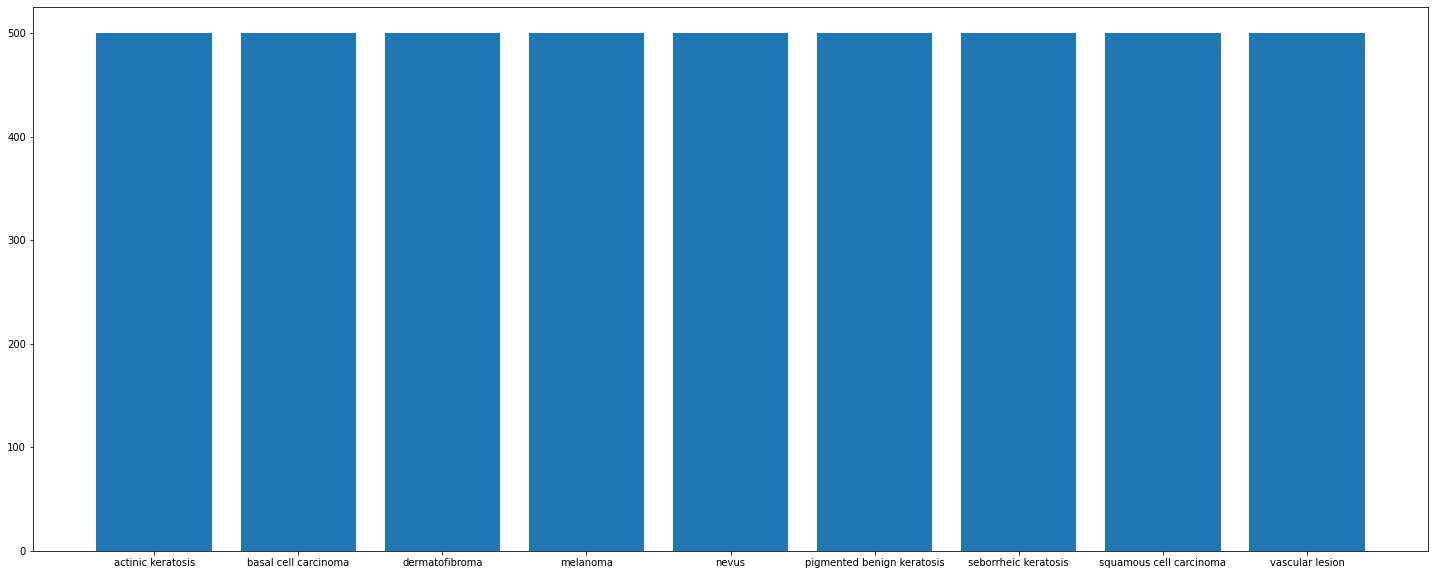

In [39]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [38]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### **Task 9: Repeating the steps for balanced augmented data**

In [40]:
batch_size = 32
img_height = 180
img_width = 180

**Create a training dataset**

In [41]:
# Provide the path here
data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

# Provide the subset value here
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Create a validation dataset**

In [42]:
# Provide the subset value here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


**Create your model (make sure to include normalization)**

In [43]:
## You should also include dropouts to tackle with overfitting. (compulsory)
# Model 3 (After adding more data and more dropout layers)

model3 = models.Sequential()

# Adding layers to the model

# Convolution and Normalisation
# Input layer with 32 filters of size 3x3
model3.add(layers.Rescaling(scale=1./255,input_shape = (180,180,3)))
model3.add(layers.Conv2D(32,(3,3), padding='same', activation = 'relu' ))
model3.add(Dropout(rate=0.20))
model3.add(layers.Conv2D(32,(3,3), padding='same', activation = 'relu'))
model3.add(Dropout(rate=0.15))

# Pooling layer
model3.add(layers.MaxPool2D(pool_size = (2,2)))

# 2nd Conv Block - 2 convolution layers and 1 Pooling layer
model3.add(layers.Conv2D(64,(3,3), padding='same', activation = 'relu'))
model3.add(Dropout(rate=0.10))
model3.add(layers.Conv2D(128,(3,3), padding='same', activation = 'relu'))
model3.add(layers.MaxPool2D(pool_size = (2,2)))

# Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(512,activation='relu'))
model3.add(Dense(512,activation='relu'))

# Output layer
model3.add(Dense(9,activation='softmax'))

In [44]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 dropout_1 (Dropout)         (None, 180, 180, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 dropout_2 (Dropout)         (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                      

**Compile your model (Choose optimizer and loss function appropriately)**

In [45]:
model3.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [48]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 dropout_1 (Dropout)         (None, 180, 180, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 dropout_2 (Dropout)         (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                      

**Train your model**

In [47]:
epochs=30
history3 = model3.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/30
169/169 [==============================] - 34s 193ms/step - loss: 2.1728 - accuracy: 0.1467 - val_loss: 2.1871 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 36s 211ms/step - loss: 2.1774 - accuracy: 0.1367 - val_loss: 2.1890 - val_accuracy: 0.1403
Epoch 3/30
169/169 [==============================] - 39s 224ms/step - loss: 2.1790 - accuracy: 0.1409 - val_loss: 2.1878 - val_accuracy: 0.1403
Epoch 4/30
169/169 [==============================] - 35s 200ms/step - loss: 2.1745 - accuracy: 0.1434 - val_loss: 2.1506 - val_accuracy: 0.2324
Epoch 5/30
169/169 [==============================] - 43s 245ms/step - loss: 2.1723 - accuracy: 0.1515 - val_loss: 2.1883 - val_accuracy: 0.1403
Epoch 6/30
169/169 [==============================] - 38s 213ms/step - loss: 2.1754 - accuracy: 0.1389 - val_loss: 2.1891 - val_accuracy: 0.1403
Epoch 7/30
169/169 [==============================] - 37s 211ms/step - loss: 2.1649 - accuracy: 0.1500 - val_loss: 2.1702 - val_ac

**Visualize the model results**

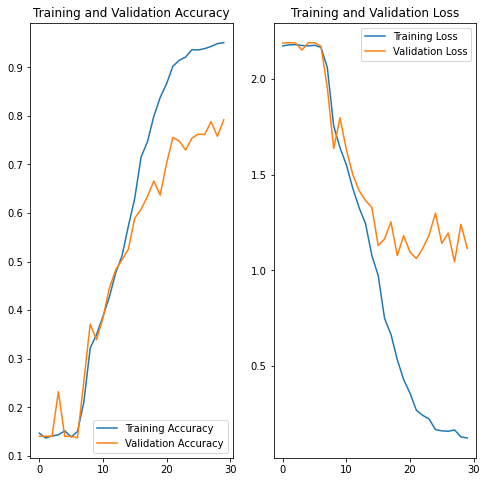

In [49]:
# Graphs
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Task 10: Analyzing the results** 


#### **Results and Analysis**
1. We first used a simple CNN model to train our model and found out that it was overfitting as training accuracy was around 90% but the validation accuracy was just around 50%. <br>
2. So we decided to use data augmentation and we found out that our second model got rid of overfitting but was underfitting on the training data as the training accuracy got reduced from 90% to 50%. <br>
3. So we checked the data distribution as saw a huge data imbalance in the data. So we generated new data using python package 'Augmentor' and added 500 images to each class. Now the proportion is very good for training.
4. After training our third model, we found out that <br>
> At 30 epochs, training accuracy = ~95% and validation accuracy = ~79%. <br>
> This is really good and it seems like with more epochs the validation accuracy would increase even more (following the trend). <br>
> We can still try to reduce some overfitting by either increasing the dropout rate or the number of dropout layers.
<br><br>
5. We can say third model is the best model so far with training accuracy as 95% and validation accuracy as 79% with 30 epochs.

#### **Question:**
- Did you get rid of underfitting/overfitting from the model? 
- Did class rebalance help in the process?


#### **Answer:**
1. Yes we reduced the overfitting upto a limit by using multiple dropout layers but we can still reduce more overfiting by either increasing the dropout layers or increasing the rate of existing dropout layers.
2. Rebalancing really helped the process as our model got huge data and trained effectively for each class.